# FG Excess Entropy Scaling Figure Generation



1. Load the "result.out". "Result.out" contains full information of the ideal gas entropy, 2PT entropy, and excess entropy throughout the simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the data into a dataframe
data = []
with open("result.out", "r") as f:
    next(f)
    next(f)
    for line in f:
        columns = line.strip().split()
        row = {
            "ln FG D(tilde)": float(columns[4]),
            "s_ex(tot)": float(columns[-1]),
            "Temperature": float(columns[1]),
            "Density": float(columns[0])
        }
        data.append(row)

df = pd.DataFrame(data)


/Users/jaehyeok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jaehyeok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


2. Plot the data

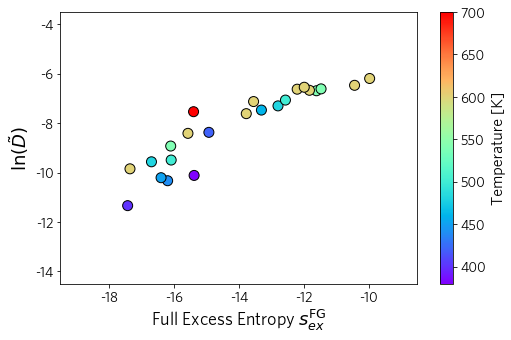

In [5]:
# Set up font settings
plt.rcParams.update({
    'font.size': 16,
    'font.family': 'DejaVu Sans',   # Default font
    #'font.family': 'Whitney Book', # Actual font used in the paper (needs to install font first)
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})
plt.rcParams['axes.unicode_minus'] = False
# Plotting
plt.figure(figsize=(8, 5))
sc = plt.scatter(df["s_ex(tot)"],df["ln FG D(tilde)"], c=df["Temperature"], s=100, cmap='rainbow', edgecolor='black')

# Plot settings
plt.ylabel(r'$\ln (\tilde{D})$',fontsize=18)
plt.ylim(-14.5,-3.5)#min(df["ln FG D(tilde)"]) - 1, max(df["ln FG D(tilde)"]) + 1)
plt.xlim(-19.5,-8.5)#min(df["s_ex(tot)"]) - 5, max(df["s_ex(tot)"]) + 5)
plt.xlabel(r'Full Excess Entropy $s_{ex}^\mathrm{FG}$',fontsize=18)
plt.yscale('linear')

# Colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Temperature [K]',fontsize=16)
plt.savefig('fg_sex_scaling.pdf', dpi=600, bbox_inches='tight')
plt.savefig('fg_sex_scaling.png', dpi=300, bbox_inches='tight')
plt.show()
